**Use Case: Locations with Free Wifi**

In [0]:
# Yelp Documentation https://www.yelp.com/developers/documentation/v3/business_search

In [0]:
# Setup Libraries
import requests as r
import numpy as np
import pandas as pd
from itertools import product

In [0]:
# Credentials: key, url, headers
url = 'https://api.yelp.com/v3/businesses/search'
key = ''
headers = {
    'Authorization': 'Bearer %s' % key
}

In [0]:
# 1st Scrape: 
# Define search parameters: location, limit, term, radius
parameters = {
    'location': '1200 West 7th Street, Los Angeles CA 90017',
    'limit': 3,
    'term': 'free wifi',
    'radius': 805
}

# Run parameters through response and save json as data
response = r.get(url, headers=headers, params=parameters)
data = response.json()
data

# **Make sure to walk through the results to ID key data fields

{'businesses': [{'alias': 'brasil-kiss-coffeebar-los-angeles-3',
   'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'},
    {'alias': 'brazilian', 'title': 'Brazilian'},
    {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}],
   'coordinates': {'latitude': 34.0519690715975,
    'longitude': -118.262663157451},
   'display_phone': '(213) 785-5131',
   'distance': 297.22449992187734,
   'id': 'ABr1g2u9p-H-coNgwpHkUg',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/WCkCdQDLBbM3_Ndq6I9Y7Q/o.jpg',
   'is_closed': False,
   'location': {'address1': '1010 Wilshire Blvd',
    'address2': None,
    'address3': '',
    'city': 'Los Angeles',
    'country': 'US',
    'display_address': ['1010 Wilshire Blvd', 'Los Angeles, CA 90017'],
    'state': 'CA',
    'zip_code': '90017'},
   'name': 'Brasil Kiss Coffeebar',
   'phone': '+12137855131',
   'price': '$$',
   'rating': 4.0,
   'review_count': 236,
   'transactions': ['delivery', 'pickup'],
   'url': 'https://www.ye

**Scale Scrape: 2 Locations, Multiple Steps**

In [0]:
# Include 2 addresses and 500 results
addresses = ['1200 West 7th Street, Los Angeles CA 90017', '200 North Spring Street, Los Angeles CA 90012']
offset = np.arange(0,500,50)

# Create list of tuples of combinations between addresses and offset
tuples = list(product(addresses,offset))

# View first 5
tuples[15]

('200 North Spring Street, Los Angeles CA 90012', 250)

In [0]:
# Use a for loop, store results into list of lists, turn into DataFrame
# Empty List
listings = []

# Future DF columns
cols = ['Name', 'Reviews','Rating','Address','Phone']

# For Loop
for address, step in tuples:
  search_parameters = {
      'location': address,
      'term': 'free wifi',
      'radius': 805,
      'limit': 50,
      'offset': step}
  resp = r.get(url, headers=headers, params=search_parameters)
  raw_data = resp.json()
  for business in raw_data['businesses']:
    name = business['name']
    reviews = business['review_count']
    rating = business['rating']
    location = business['location']['display_address'][0]
    phone = business['display_phone']
    listings.append([name, reviews, rating, location, phone])
  df = pd.DataFrame.from_records(listings, index='Name', columns=cols)
print(f'Total Records: {len(df)}')
df.head()

Total Records: 97


,Reviews,Rating,Address,Phone
Name,,,,
Brasil Kiss Coffeebar,236,4.0,1010 Wilshire Blvd,(213) 785-5131
Philz Coffee,928,4.5,801 S Hope St,(213) 213-2616
Fairgrounds Coffee and Tea,70,4.0,1256 W 7th St,(213) 378-0382
Café WG,30,3.5,900 Wilshire Blvd,(213) 439-9025
Kachi Deli Cafe & Grill,280,4.0,1055 Wilshire Blvd,(213) 482-4553


In [0]:
# Surface Level Explortion
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, Brasil Kiss Coffeebar to Nicole Juicery
Data columns (total 4 columns):
Reviews    97 non-null int64
Rating     97 non-null float64
Address    97 non-null object
Phone      97 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 6.3+ KB


None

,Reviews,Rating
count,97.000000,97.000000
mean,418.257732,3.793814
std,936.387710,0.756061
min,2.000000,1.500000
25%,50.000000,3.500000
50%,108.000000,4.000000
75%,302.000000,4.500000
max,6117.000000,5.000000


In [0]:
# Check Most Reviews & Ratings
df = df.sort_values(by='Reviews', ascending=False)
display(df.head())
df = df.sort_values(by='Rating', ascending=False)
display(df.head())

,Reviews,Rating,Address,Phone
Name,,,,
Philippe the Original,6117,4.0,1001 N Alameda St,(213) 628-3781
Eggslut,5673,4.0,317 S Broadway,(213) 625-0292
Original Pantry Cafe,2992,3.5,877 S Figueroa St,(213) 972-9279
Cafe Dulce,2127,4.0,134 Japanese Village Plz,(213) 346-9910
The Last Bookstore,2053,4.5,453 S Spring St,(213) 488-0599


,Reviews,Rating,Address,Phone
Name,,,,
Tilt Coffee Bar,337,5.0,334 S Main St,
Tea Master Matcha Cafe & Green Tea Shop,1372,5.0,450 E 2nd St,(213) 680-1006
Orange County Pinballs,39,5.0,629 W Valencia Dr,(714) 451-6308
Your Thyme Cafe,28,5.0,123 Astronaut Ellison S Onizuka St,(213) 628-3173
Strada Eateria & Coffee,273,5.0,119 E 5th St,(213) 822-4558


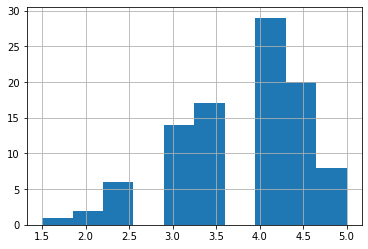

In [0]:
# Explore Ratings & Reviews Distribution
df['Rating'].hist()

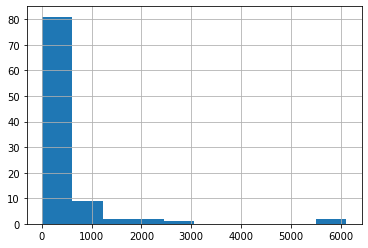

In [0]:
df['Reviews'].hist()